In [1]:
import torch
import numpy as np

x= torch.tensor([[1,2,3],[4,5,6]])
y= torch.tensor([[7,8,9], [10,11,12]])
f= 2*x + y
print(f)

tensor([[  9,  12,  15],
        [ 18,  21,  24]])


In [2]:
shape=[2,3]
xzeros =torch.zeros(shape)
xones = torch.ones(shape)
xrnd = torch.rand(shape)
print(xzeros)
print(xones)
print(xrnd)

tensor([[ 0.,  0.,  0.],
        [ 0.,  0.,  0.]])
tensor([[ 1.,  1.,  1.],
        [ 1.,  1.,  1.]])
tensor([[ 0.9663,  0.0252,  0.5935],
        [ 0.0047,  0.9107,  0.7989]])


In [3]:
torch.manual_seed(42)
print(torch.rand([2,3]))

tensor([[ 0.8823,  0.9150,  0.3829],
        [ 0.9593,  0.3904,  0.6009]])


In [4]:
import numpy as np
xnp= np.array([[1,2,3],[4,5,6]])
f2= xnp + y
print(f2)
f2.type()

tensor([[  8,  10,  12],
        [ 14,  16,  18]])


'torch.LongTensor'

In [5]:
print(f.type()) #call the tensors type method
fnp = f.numpy() #create an array from the tensor
type(fnp) #uses the python inbuilt type()

torch.LongTensor


numpy.ndarray

In [6]:
xtensor = torch.from_numpy(xnp)
print(xtensor)
print(xtensor.type())

tensor([[ 1,  2,  3],
        [ 4,  5,  6]])
torch.LongTensor


In [7]:
a = np.ones(3)                  
t = torch.from_numpy(a)      #create a tensor from an array
b = t.numpy()                #Create an array from the tensor
b[1] = 0                     #change a value in the array
print(a[1] == b[1])          #this value changes in the original array
print(t)                     # and also in the tensor - they share the same memory

True
tensor([ 1.,  0.,  1.], dtype=torch.float64)


In [8]:
int8np=np.ones((2,3),dtype=np.int8)
bad= torch.from_numpy(int8np)

TypeError: can't convert np.ndarray of type numpy.int8. The only supported types are: double, float, float16, int64, int32, and uint8.

In [9]:
good = torch.from_numpy(int8np.astype(np.int32))
good.type()

'torch.IntTensor'

In [10]:
xint=torch.ones((2,3), dtype=torch.int)
xint.type()

'torch.IntTensor'

In [11]:
print(x[0])
print(x[1][0:2])

tensor([ 1,  2,  3])
tensor([ 4,  5])


In [12]:
print(x.size())
print(x.view(-1))
print(x.view(3,2))
print(x.view(6,1))

torch.Size([2, 3])
tensor([ 1,  2,  3,  4,  5,  6])
tensor([[ 1,  2],
        [ 3,  4],
        [ 5,  6]])
tensor([[ 1],
        [ 2],
        [ 3],
        [ 4],
        [ 5],
        [ 6]])


In [13]:
print(x.view(3,-1))

tensor([[ 1,  2],
        [ 3,  4],
        [ 5,  6]])


In [14]:
print(x.transpose(0,1).size())
x.size()

torch.Size([3, 2])


torch.Size([2, 3])

In [15]:
a = torch.ones(1,2,3,4)
print(a.transpose(0,3).transpose(1,2).size())    #swaps axis in two steps
print(a.permute(3,2,1,0).size())                 #swaps all axis at once

torch.Size([4, 3, 2, 1])
torch.Size([4, 3, 2, 1])


In [16]:
print(x)
x.transpose_(1,0)
print(x)

tensor([[ 1,  2,  3],
        [ 4,  5,  6]])
tensor([[ 1,  4],
        [ 2,  5],
        [ 3,  6]])


In [19]:
import torch
import torchvision
import torchvision.transforms as transforms

trainset = torchvision.datasets.CIFAR10(root='./data',   #data root directory 
                                             #The training set
                                        download=True,   #checks if data has downloaded else does so
                                        transform = transforms.ToTensor())  #transforms to tensor
trainset

Files already downloaded and verified


Dataset CIFAR10
    Number of datapoints: 50000
    Split: train
    Root Location: ./data
    Transforms (if any): ToTensor()
    Target Transforms (if any): None

In [20]:
for i in range(len(trainset)):
    print('size of image {} label {}'.format(trainset[i][0].size() , trainset[i][1]))
    if i>1: break

size of image torch.Size([3, 32, 32]) label 6
size of image torch.Size([3, 32, 32]) label 9
size of image torch.Size([3, 32, 32]) label 9


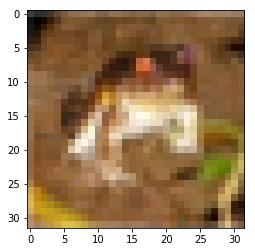

In [21]:
import matplotlib.pyplot as plt
%matplotlib inline

torchimage=trainset[0][0]    #Indexes the first element of the first tuple ie the 1st image
npimage=torchimage.permute(1, 2, 0) #changes the axis C H W to H W C
plt.imshow(npimage)    #plots the image - no need to convert to numpy 

In [22]:
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms
from PIL import Image
import torch
import csv
import os

class toyDataset(Dataset):
 
    def __init__(self, dataPath, labelsFile,  transform=None, train =True):       
               
        self.dataPath=dataPath     #the path to the data directory
        self.transform = transform  #a transform object
        self.train = train
        
        #builds a list of (name,label) tuples        
        with open(os.path.join(self.dataPath,labelsFile)) as f:
            self.labels=[tuple(line) for line in csv.reader(f)]        
        # checks that all images files exist
        l=len(self.labels)
        for i in range(l):
             assert os.path.isfile(dataPath + '/' + self.labels[i][0])  
        ind = int(0.9 * l) 
        self.trainset, self.testset = self.labels[:ind] , self.labels[ind:]
    
    # so we can use dataset.len()
    def __len__(self):
        if self.train:
            return len(self.trainset)
        else:
            return len(self.testset)
    
    #so we can use indexing
    def __getitem__(self, idx):
        if self.train:
            imageName,imageLabel=self.trainset[idx][0:]
        else:
             imageName,imageLabel=self.testset[idx][0:]
            
        imagePath =  os.path.join(self.dataPath,imageName)              
        image = Image.open(open(imagePath, 'rb'))
                   
        #transforms the image if required
        if self.transform:
            image = self.transform(image)
        
        return((image,imageLabel))

In [23]:
toydata = toyDataset('data/GiuseppeToys','labels.csv', transform=transforms.ToTensor())
print(toydata[0][0].size()) #the size of the first image in the dataset
print(toydata[0][1]) #the label
print(len(toydata))

torch.Size([3, 551, 816])
 toy
108


In [24]:
tforms= transforms.Compose([transforms.Grayscale(3), transforms.CenterCrop(300), transforms.ToTensor()])
toyData=toyDataset('data/GiuseppeToys','labels.csv', transform =tforms)

In [25]:
toyloader = DataLoader(toyData, batch_size=4, shuffle=False)
toyiter= iter(toyloader)
images, labels = toyiter.next()
labels=labels[0:]
print(labels)                      
print(images.size())        

(' toy', ' notoy ', ' notoy ', ' toy')
torch.Size([4, 3, 300, 300])


In [26]:
from torchvision import datasets
dataFromFolders = datasets.ImageFolder(root='data/GiuseppeToys/images', transform=tforms)
folderloader = DataLoader(dataFromFolders, batch_size=4, shuffle=True)
images, labels = iter(folderloader).next()
print(labels)

tensor([ 3,  2,  2,  2])


In [27]:
class RemoveChannel(object):
    def __init__(self, color):
        #color = 'r' 'g' or 'b' - determines which color to remove 
        self.color=color
        
    def __call__(self, image):
        if self.color == 'r':            
            image[0,:,:] = 0             
        elif self.color == 'b':
            image[1,:,:] = 0            
        elif self.color == 'g':
            image[2,:,:] = 0        
        return(image)   

In [28]:
cc2,cc3=RemoveChannel('b'), RemoveChannel('g')
tforms2=transforms.Compose([transforms.CenterCrop(500), transforms.ToTensor(), cc2])
tforms3=transforms.Compose([transforms.CenterCrop(500), transforms.ToTensor(), cc2])
toydata2=toyDataset('data/GiuseppeToys','labels.csv', transform =tforms2, train=True)
toydata3=toyDataset('data/GiuseppeToys','labels.csv', transform =tforms3, train=True)
concatDataset= torch.utils.data.ConcatDataset([toydata,toydata2, toydata3])
len(concatDataset)

324